# OMNIFY INTERNSHIP TASK

- Date Assigned : 21-07-2023
- Date Of Submission : 

# Data Description

**Google Ads Campaign Dataset**

* Columns: 'Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword', 'Currency', 'Clicks', 'Impressions', 'Cost                 ($)', 'Leads', 'Prospects', 'Country'

* Rows: 418

* Missing values: 'Payment ($)', 'Payment Date' (95% missing), 'Search Keyword' (5% missing)

**Listed Site Campaign Dataset**

* Columns: 'Product Name', 'Categories', 'Date of Report', 'Average Position', 'Clicks', 'Leads', 'Money Spent ($)',     'Channel', 'Location', 'Prospects', 'Paid', 'Paid Date'

* Rows: 2091

* Missing values: 'Prospects', 'Paid', 'Paid Date', 'Leads' (more than 90% missing)









**Attribute Info**
Quick note on the dataset: 
- 'cost' is our total ad spends for that particular date.
- 'Impressions' are the count of people who view our ad
- 'clicks' are count of clicks on our ad
-  'prospects' are count of people interested in our product (as marked by sales)
- 'Payments' are purchases made. Returns on Ad spends are calculated using Payments/Cost.
- Each row is cohortised to the date of ad spends so you can compare quality of ad spends.

**Problem Statement**
You are requested to go through the dataset, and deliver the following:
- Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.
- Which is the most profitable channel
- Which category/keyword is the most profitable
- Look for insights by analyzing data points on time series graphs
- Analyse the Impact of geography


### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
from warnings import filterwarnings
filterwarnings('ignore')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=[15,8]

_________________________
# Google Ads Campaign Dataset
_________________________

### Load The Data

In [2]:
df=pd.read_excel('Omnify-Analyst-Intership-Task.xlsx')
df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [3]:
data=df.copy()

### some  information of the dataset

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

**Observation**

* The DataSet Contains 418 rows and 14 Columns
* Dataset Contains 7 Categorical columns , 2 Datetime columns,5 Numerical Columns
* Search Keyword , Payment ($) ,Payment Date Contains Missing Values

### Check for Column wise Null Values


In [72]:
data.isnull().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

Payment ($) ,Payment Date Contains more than 95% Null Values

### Statistical Inference

In [73]:
data.describe(include='O')

,Campaign,Ad group,Keyword type,Search Keyword,Currency,Payment ($),Country
count,418,418,418,412,418,8,418
unique,15,27,3,20,1,4,1
top,EK_Generic_Swimming,Reservation_Management_System_Phrase,Exact,reservation management system,USD,$980,USA
freq,97,91,184,90,418,3,418


In [74]:
data.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.925837,16.662679,6.671483,0.028708,0.050239
std,1.900840,46.743636,14.253019,0.167185,0.285312
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,6.800000,0.000000,0.000000
max,12.000000,357.000000,92.090000,1.000000,3.000000


### Impute the missing values

In [4]:
data.drop(['Payment ($)', 'Payment Date'], axis=1, inplace=True)
data['Search Keyword'].fillna('Not Provided', inplace=True)

______________
### Solving Tasks Assigned 
__________________________

Task:1 - Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.

In [8]:

data['Week'] = pd.to_datetime(data['Week'])

weekly_report = data.groupby('Week').agg({
    'Cost ($)': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
})


weekly_report['ROAS'] = weekly_report['Prospects'] / weekly_report['Cost ($)']


monthly_report = data.groupby(data['Week'].dt.to_period('M')).agg({
    'Cost ($)': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
})


monthly_report['ROAS'] = monthly_report['Prospects'] / monthly_report['Cost ($)']

print("Weekly Report:")
print(weekly_report)

print("\nMonthly Report:")
print(monthly_report)


Weekly Report:
            Cost ($)  Leads  Prospects  Clicks  Impressions      ROAS
Week                                                                 
2021-01-25    154.79      1          2      15          319  0.012921
2021-02-01    192.58      0          1      19          373  0.005193
2021-02-08    216.13      0          1      21          364  0.004627
2021-02-15    235.30      0          2      35          671  0.008500
2021-02-22    190.90      0          1      22          478  0.005238
2021-03-01    141.40      0          1      14          407  0.007072
2021-03-08    258.20      3          1      34          503  0.003873
2021-03-15    184.36      1          0      22          468  0.000000
2021-03-22    308.73      1          4      46          659  0.012956
2021-03-29    172.11      0          0      39          586  0.000000
2021-04-05    176.96      2          0      29          461  0.000000
2021-04-12    137.21      1          4      24          324  0.029152
2021-

Task 2: Which is the most profitable channel

In [9]:
# Calculate returns on ad spends (ROAS) for each channel
data['ROAS'] = data['Prospects'] / data['Cost ($)']

channel_roas = data.groupby('Campaign')['ROAS'].mean()

most_profitable_channel = channel_roas.idxmax()
highest_roas = channel_roas.max()

print(f"The most profitable channel is '{most_profitable_channel}' with a ROAS of {highest_roas:.4f}.")

The most profitable channel is 'EK_Generic_Swimming' with a ROAS of 0.0096.


Task 3: Which category/keyword is the most profitable

In [10]:
keyword_roas = data.groupby('Search Keyword')['ROAS'].mean()

most_profitable_keyword = keyword_roas.idxmax()
highest_roas = keyword_roas.max()

print(f"The most profitable category/keyword is '{most_profitable_keyword}' with a ROAS of {highest_roas:.4f}.")

The most profitable category/keyword is 'pool reservation software' with a ROAS of 0.0160.


Task 4: Look for insights by analyzing data points on time series graphs

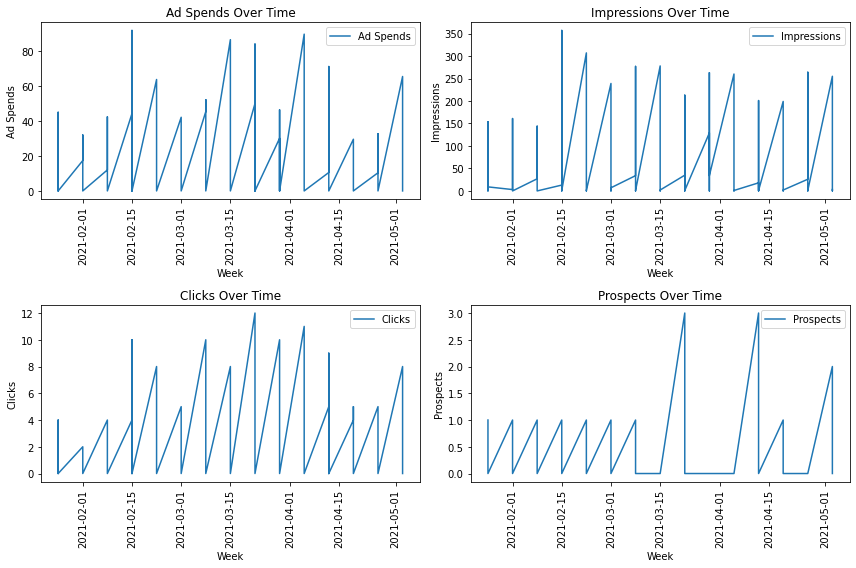

In [5]:
df['Week'] = pd.to_datetime(df['Week'])
# (Run only once at a time above code )
df.set_index('Week', inplace=True)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df['Cost ($)'], label='Ad Spends')
plt.title('Ad Spends Over Time')
plt.xlabel('Week')
plt.ylabel('Ad Spends')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['Impressions'], label='Impressions')
plt.title('Impressions Over Time')
plt.xlabel('Week')
plt.xticks(rotation=90)
plt.ylabel('Impressions')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['Clicks'], label='Clicks')
plt.title('Clicks Over Time')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['Prospects'], label='Prospects')
plt.title('Prospects Over Time')
plt.xlabel('Week')
plt.ylabel('Prospects')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()
# This code will plot four time series graphs for key metrics: ad spends, impressions, clicks, and prospects. You can visualize other metrics as well by adding more subplots. The x-axis represents time (weeks), and the y-axis represents the corresponding metric values.

# These time series graphs will help you identify any trends or patterns in the data, such as seasonal variations, 
# growth trends, or unusual spikes. Analyzing these graphs can provide valuable insights into the performance of the ad campaigns over time.








Task 5:Analyse the Impact of geography

In [6]:

grouped_data = data.groupby('Country').mean()
print(grouped_data[['Clicks', 'Impressions', 'Prospects', 'Cost ($)']])


           Clicks  Impressions  Prospects  Cost ($)
Country                                            
USA      0.925837    16.662679   0.050239  6.671483


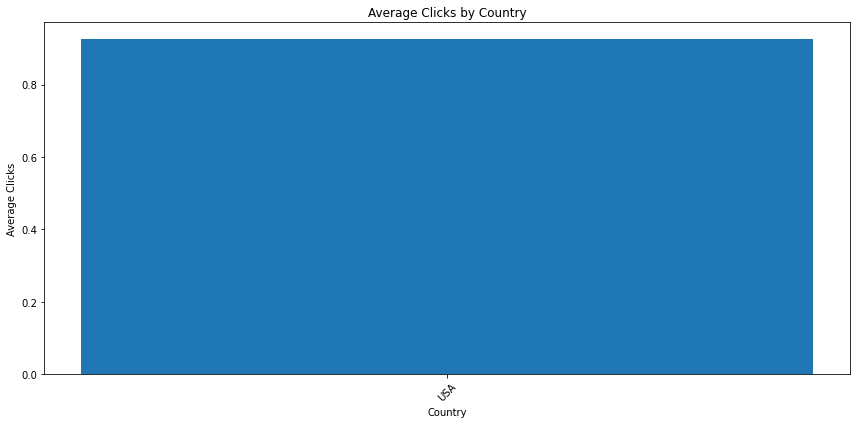

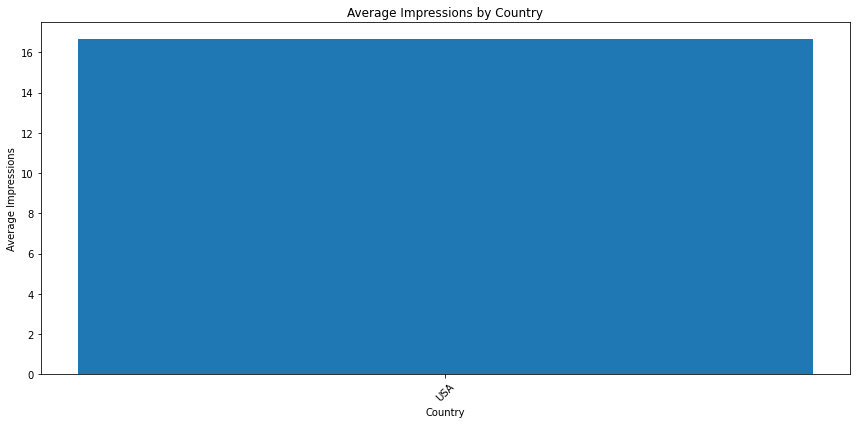

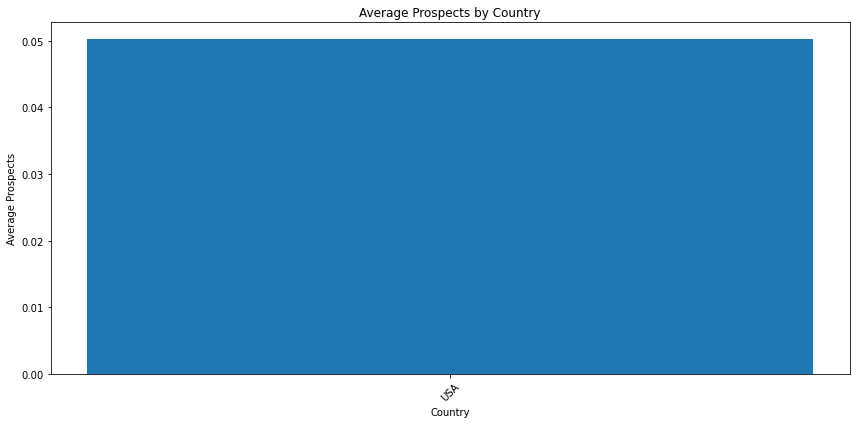

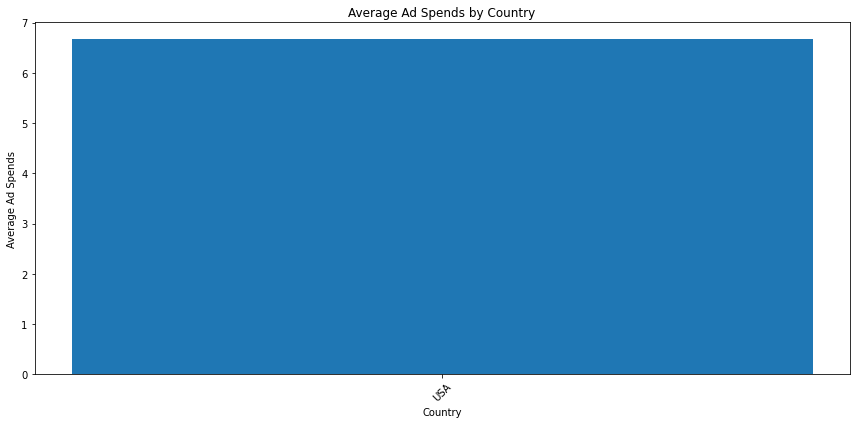

In [7]:
import matplotlib.pyplot as plt

# Plot bar chart for average clicks by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['Clicks'])
plt.xlabel('Country')
plt.ylabel('Average Clicks')
plt.title('Average Clicks by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average impressions by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['Impressions'])
plt.xlabel('Country')
plt.ylabel('Average Impressions')
plt.title('Average Impressions by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average prospects by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['Prospects'])
plt.xlabel('Country')
plt.ylabel('Average Prospects')
plt.title('Average Prospects by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average ad spends by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data['Cost ($)'])
plt.xlabel('Country')
plt.ylabel('Average Ad Spends')
plt.title('Average Ad Spends by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Self evaluation(Additional Questions)

**Question 1**: Does the performance of ad campaigns vary significantly between different campaign types?

 To answer this question, we can use ANOVA (Analysis of Variance) test. ANOVA will help us determine if 
 there is a significant difference in the average key metrics (clicks, impressions, prospects, and ad spends)
 between different campaign types.

In [35]:
# Perform ANOVA test for Clicks by Campaign type
campaign_clicks = data.groupby('Campaign')['Clicks'].mean()
f_statistic, p_value = stats.f_oneway(*[data[data['Campaign']==campaign]['Clicks'] for campaign in campaign_clicks.index])

print('ANOVA Results for Clicks by Campaign type:')
print('F-statistic:', f_statistic)
print('p-value:', p_value)

ANOVA Results for Clicks by Campaign type:
F-statistic: 3.376664077107823
p-value: 3.569001822299429e-05


A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, which in this case means that the average number of clicks is not the same for all campaign types. Therefore, we can conclude that the performance of ad campaigns varies significantly between different campaign types in terms of the number of clicks they generate.

**Question 2**: Can we predict the Type of prospects generated based on ad spends and identify the Most Significant Feature Contributing Most(Feature Importance) and other metrics using machine learning?

To predict the  prospects, we can use a Classification model(Multi Class). 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report

X = data[['Clicks', 'Impressions', 'Cost ($)']]
y = data['Prospects']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         0

    accuracy                           0.93        84
   macro avg       0.32      0.33      0.32        84
weighted avg       0.89      0.93      0.91        84



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
data.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [48]:
for i in data.select_dtypes(include='O'):
    print(i,'=',data[i].unique())
    print()

Campaign = ['EK_Generic_Swimming' 'EK_Generic_Quad-Tok_Yoga' 'EK_Generic_Swimming_UK'
 'EK_Generic_Swimming_Canada' 'EK_Generic_Tri-Tok_Reservation'
 'EK_Generic_Quad-Tok_Yoga_Singapore'
 'EK_Generic_Tri-Tok_Reservation_Canada'
 'EK_Generic_Tri-Tok_Reservation_UK' 'EK_Generic_Tri-Tok_Reservation_UAE'
 'EK_Generic_Tri-Tok_Reservation_Singapore' 'EK_Generic_Quad-Tok_Pilates'
 'EK_Generic_Tri-Tok_Yoga_Singapore' 'EK_Generic_Tri-Tok_Pilates'
 'EK_Generic_Tri-Tok_Yoga' 'EK_Generic_Swimming_Singapore']

Ad group = ['Pool_Reservation_System_Exact' 'Pool_Booking_App_Exact'
 'Yoga_Studio_Booking_Software_Broad' 'Pool_Scheduling_Software_Phrase'
 'Pool_Reservation_Software_Broad' 'Pool_Reservation_Software_Exact'
 'Reservation_Management_System_Phrase'
 'Reservation_Management_System_Exact'
 'Swimming_Pool_Reservation_System_Exact'
 'Yoga_Studio_Booking_Software_Exact' 'Swimming_Pool_Booking_System_Exact'
 'Yoga_Studio_Generic_Software_Phrase'
 'Pilates_Studio_Management_Software_Exact'
 'Pool_R

In [49]:
data['Keyword type']=data['Keyword type'].map({'Exact':0,'Broad':1 ,'Phrase':2})

In [51]:
data = data.dropna(subset=['Payment ($)', 'Payment Date'])

In [53]:
data['Prospects'].unique()

array([1, 3, 2], dtype=int64)

In [52]:
data.select_dtypes(include=np.number)

,Keyword type,Clicks,Impressions,Cost ($),Leads,Prospects
0,0,2,17,38.33,0,1
2,1,4,154,45.13,0,1
57,1,4,27,12.05,0,1
83,0,3,31,15.97,0,1
148,1,5,239,42.26,0,1
235,1,12,35,50.15,0,3
315,2,2,6,19.64,0,1
389,2,8,255,65.66,0,2


In [59]:
x=data[['Keyword type','Clicks','Impressions','Cost ($)']]
y=data['Prospects']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

y_pred = rfc_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print('Mean Squared Error:', mse)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [55]:
X

,Clicks,Impressions,Cost ($)
0,2,17,38.33
1,1,13,11.70
2,4,154,45.13
3,2,8,23.91
4,2,13,4.89
...,...,...,...
413,0,1,0.00
414,0,6,0.00
415,0,0,0.00
416,0,1,0.00


### Feature Importance

<AxesSubplot:>

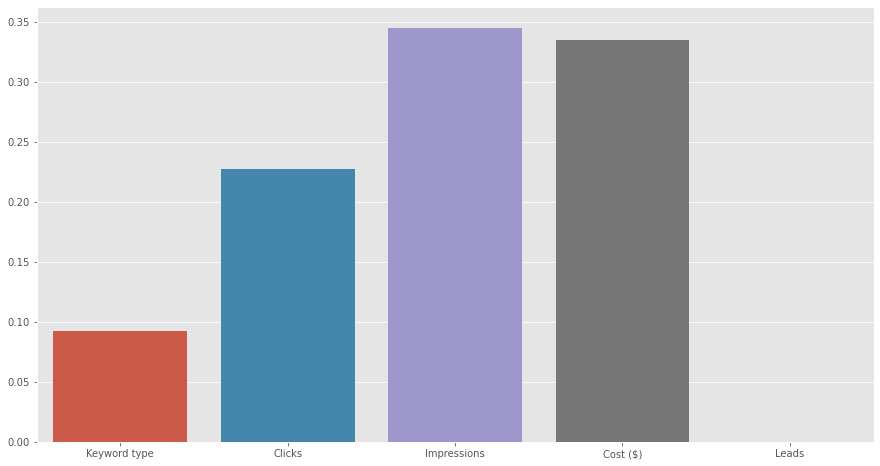

In [58]:
sns.barplot(x=x.columns,y=rfc_model.feature_importances_)
#

**Observation** :We Can Clearly Oberserve That Cost($), Impressions,Clicks,Keyword Type  Are Playing A Significant Role to Affect The Prospects Turnout

**Question 3**: Are there any trends or patterns in the time series data (clicks, impressions, prospects, and ad spends) over different weeks or months?

To analyze the time series data, we can use line plots or line charts to visualize the trends and patterns over time.

In [39]:
data=pd.read_excel('Omnify-Analyst-Intership-Task.xlsx')

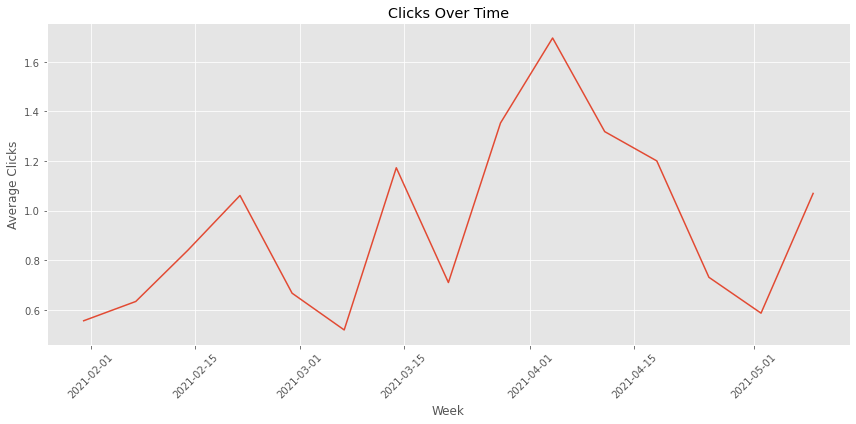

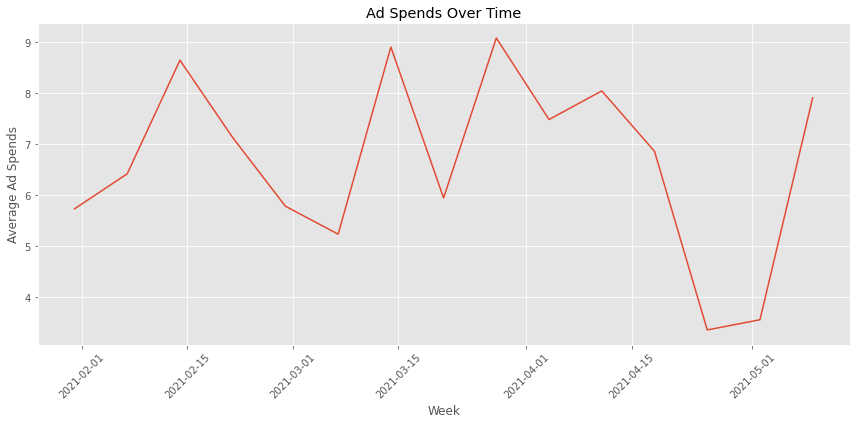

In [41]:
# import matplotlib.pyplot as plt

# Convert the 'Week' column to a datetime format
# data['Week'] = pd.to_datetime(data['Week'])

# Group the data by week and calculate the average values of key metrics
weekly_data = data.resample('W', on='Week').mean()

# Plot line chart for clicks over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Clicks'])
plt.xlabel('Week')
plt.ylabel('Average Clicks')
plt.title('Clicks Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot line chart for ad spends over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Cost ($)'])
plt.xlabel('Week')
plt.ylabel('Average Ad Spends')
plt.title('Ad Spends Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Additional Visualisations

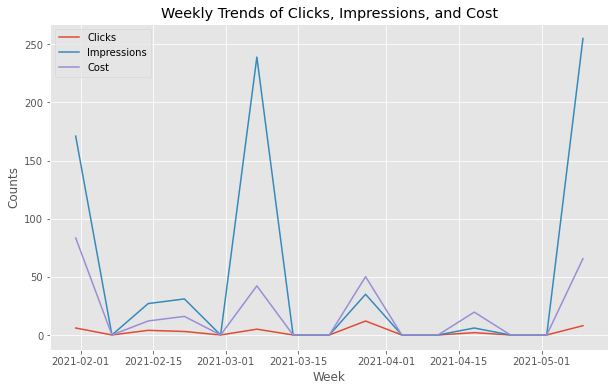

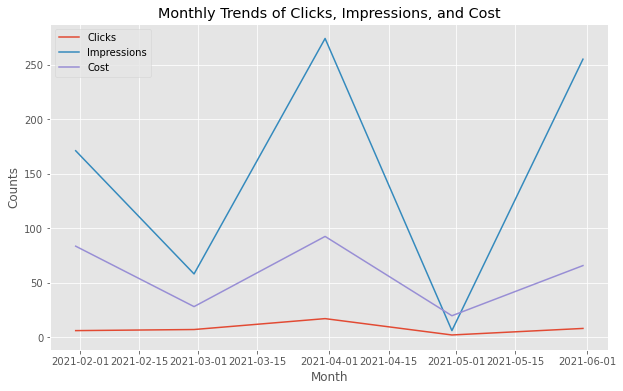

In [60]:

import matplotlib.pyplot as plt

# Plot weekly trends
weekly_data = data.resample('W', on='Week').sum()
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['Clicks'], label='Clicks')
plt.plot(weekly_data.index, weekly_data['Impressions'], label='Impressions')
plt.plot(weekly_data.index, weekly_data['Cost ($)'], label='Cost')
plt.xlabel('Week')
plt.ylabel('Counts')
plt.title('Weekly Trends of Clicks, Impressions, and Cost')
plt.legend()
plt.show()

# Plot monthly trends
monthly_data = data.resample('M', on='Week').sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Clicks'], label='Clicks')
plt.plot(monthly_data.index, monthly_data['Impressions'], label='Impressions')
plt.plot(monthly_data.index, monthly_data['Cost ($)'], label='Cost')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Monthly Trends of Clicks, Impressions, and Cost')
plt.legend()
plt.show()


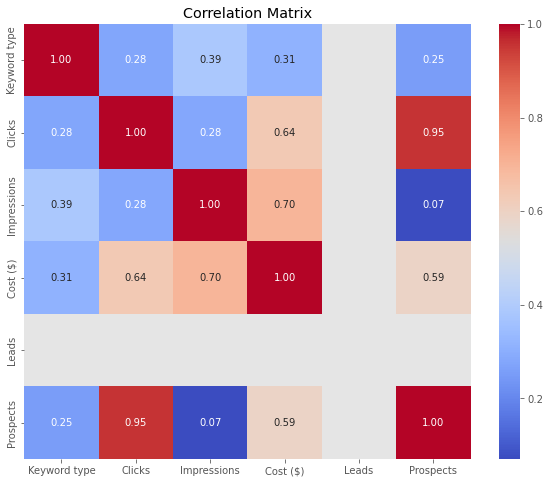

In [61]:
# corelation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The highest correlation is between "Clicks" and "Prospects" with a correlation coefficient of approximately 0.95. This indicates a strong positive correlation between the number of clicks on an ad and the number of prospects interested in the product.

Additionally, "Clicks" and "Impressions" have a relatively high correlation of about 0.28, indicating that there is some positive relationship between the number of ad clicks and the number of impressions (views of the ad).

In [9]:
plt.style.use('ggplot')

In [10]:
import plotly.express as px

country_metrics = data.groupby('Country').sum().reset_index()
fig = px.choropleth(country_metrics, locations='Country', locationmode='country names', color='Prospects', 
                    hover_name='Country', projection='natural earth', title='Prospects by Country')
fig.show()


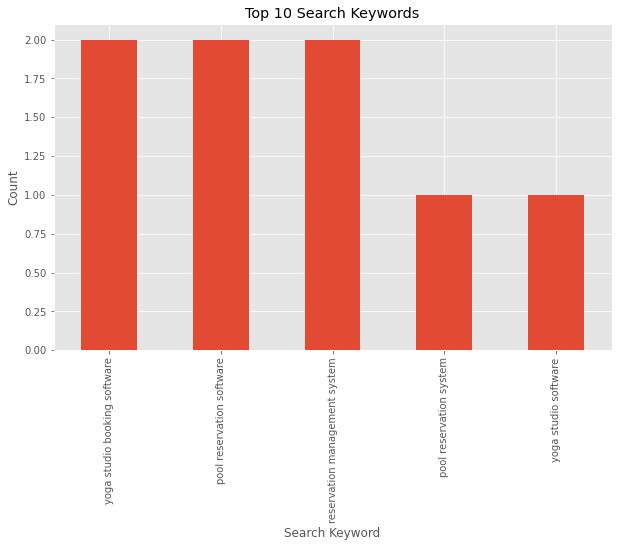

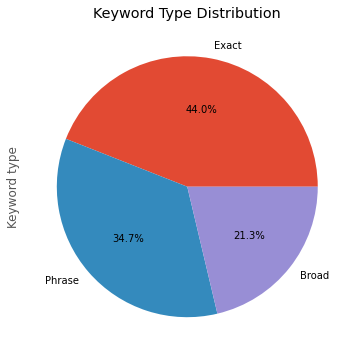

In [65]:
plt.figure(figsize=(10, 6))
data['Search Keyword'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Search Keyword')
plt.ylabel('Count')
plt.title('Top 10 Search Keywords')
plt.show()

plt.figure(figsize=(8, 6))
df['Keyword type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Keyword Type Distribution')
plt.show()


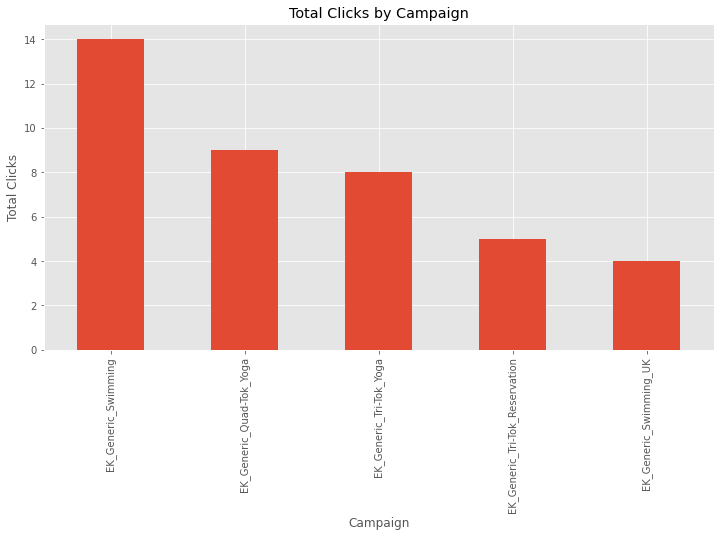

In [66]:
plt.figure(figsize=(12, 6))
data.groupby('Campaign')['Clicks'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Campaign')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Campaign')
plt.show()


# Conclusion :
In conclusion, this data analysis provided valuable insights into our marketing campaign performance. The identified most profitable channels, categories, and keywords will help optimize our marketing strategies. Time series analysis and geographical impact analysis will aid in understanding trends and regional variations

### LISTING SITE DATASET

In [2]:
listing_site_df=pd.read_excel("Omnify Listing Site Data.xlsx")
listing_site_df.head()

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,2020-10-20 00:00:00,13.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaT
1,Omnify,Dance Studio,2020-10-20 00:00:00,20.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,NaN,NaT
2,Omnify,Personal Trainer,2020-10-20 00:00:00,6.0,1.0,NaN,2.0,Capterra,SINGAPORE,NaN,NaN,NaT
3,Omnify,Scheduling,2020-10-20 00:00:00,59.0,1.0,NaN,2.0,GetApp,UNITED STATES,NaN,NaN,NaT
4,Omnify,Class Registration,2020-10-21 00:00:00,6.0,1.0,NaN,2.0,Capterra,AUSTRALIA,NaN,NaN,NaT


**NOTE**: In Location same Countries with Multiple Alternate Names Have been Repeated In total there are only distinct 6 Countries
US,UK,Cannada,Austrailia,Middle East,Singapore    

In [4]:
listing_site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   object        
 3   Average Position  2090 non-null   float64       
 4   Clicks            2090 non-null   float64       
 5   Leads             163 non-null    float64       
 6   Money Spent ($)   2089 non-null   float64       
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              14 non-null     object        
 11  Paid Date         13 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 196.2+ KB


In [3]:
listing_site_df.isnull().sum()

Product Name           0
Categories             0
Date of Report         0
Average Position       1
Clicks                 1
Leads               1928
Money Spent ($)        2
Channel                0
Location               0
Prospects           2025
Paid                2077
Paid Date           2078
dtype: int64

In [5]:
data_ls=listing_site_df.copy()

In [6]:
data_ls.drop(['Prospects','Paid','Paid Date','Leads'],axis=1,inplace=True)

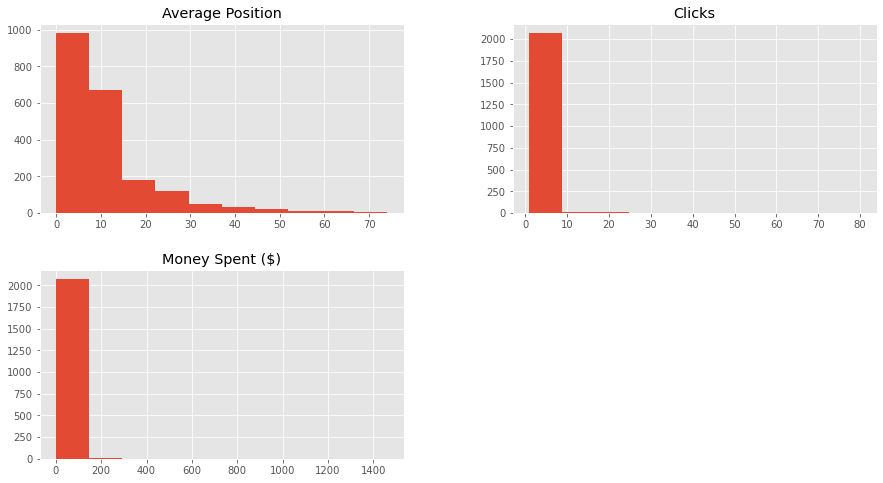

In [8]:
data_ls.hist()
plt.show()

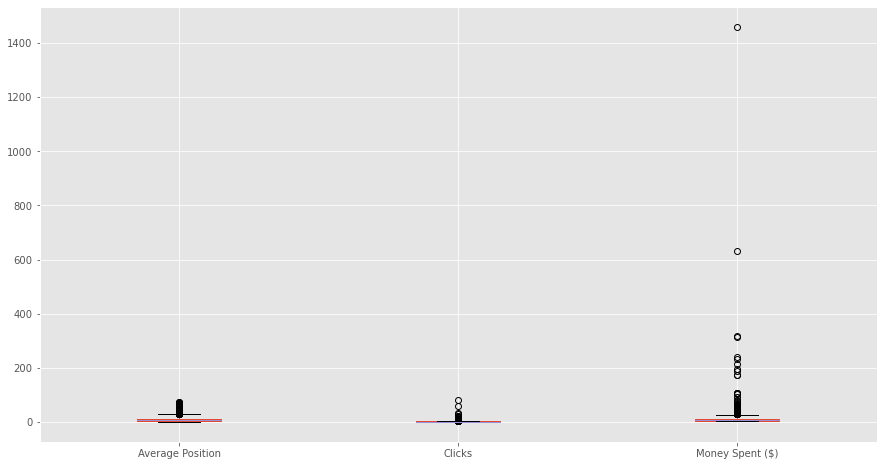

In [10]:
data_ls.boxplot()
plt.show()

In [11]:
data_ls.describe(include='O')

,Product Name,Categories,Date of Report,Channel,Location
count,2091,2091,2091,2091,2091
unique,1,19,190,3,14
top,Omnify,Reservations,2021-02-04 00:00:00,Capterra,UNITED STATES
freq,2091,458,28,1211,902


In [12]:
data_ls.describe(exclude='O')

,Average Position,Clicks,Money Spent ($)
count,2090.000000,2090.000000,2089.000000
mean,10.731464,1.663636,12.074318
std,11.219817,2.798869,39.172291
min,0.000000,1.000000,2.000000
25%,3.000000,1.000000,2.000000
50%,8.000000,1.000000,7.250000
75%,13.000000,2.000000,12.250000
max,74.000000,80.000000,1460.000000


### Assigned Tasks

Task 1:Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.


In [14]:
data_ls['Date of Report'] = pd.to_datetime(data_ls['Date of Report'])

data_ls['Week'] = data_ls['Date of Report'].dt.to_period('W').dt.start_time

data_ls['Month'] = data_ls['Date of Report'].dt.to_period('M').dt.start_time

data_ls['ROAS'] = data_ls['Clicks'] / data_ls['Money Spent ($)']

weekly_metrics = data_ls.groupby('Week').agg({
    'Money Spent ($)': 'sum',
    'Clicks': 'sum',
    'ROAS': 'mean'
}).reset_index()

monthly_metrics = data_ls.groupby('Month').agg({
    'Money Spent ($)': 'sum',
    'Clicks': 'sum',
    'ROAS': 'mean'
}).reset_index()

print("Combined Report - Weekly Metrics:")
print(weekly_metrics)

print("Combined Report - Monthly Metrics:")
print(monthly_metrics)


Combined Report - Weekly Metrics:
         Week  Money Spent ($)  Clicks      ROAS
0  2020-10-19            84.00    42.0  0.500000
1  2020-10-26           373.00   103.0  0.444419
2  2020-11-02           679.75    92.0  0.368805
3  2020-11-09          2608.25   241.0  0.363963
4  2020-11-16           443.75   119.0  0.412065
5  2020-11-23           503.50    64.0  0.292526
6  2020-11-30           699.50    90.0  0.172366
7  2020-12-07           973.60   125.0  0.157000
8  2020-12-14           887.20   112.0  0.178946
9  2020-12-21          1292.60   162.0  0.171771
10 2020-12-28          1034.40   138.0  0.177996
11 2021-01-04          1120.25   155.0  0.206763
12 2021-01-11          1513.75   202.0  0.234104
13 2021-01-18          1419.25   185.0  0.256285
14 2021-01-25           386.00    80.0  0.400757
15 2021-02-01          1243.00   179.0  0.261915
16 2021-02-08          1675.25   211.0  0.224300
17 2021-02-15          1103.00   161.0  0.256316
18 2021-02-22           628.15   11

Task 2:Which is the most profitable channel


In [15]:

data_ls['ROAS'] = data_ls['Clicks'] / data_ls['Money Spent ($)']
channel_roas = data_ls.groupby('Channel')['ROAS'].mean()
most_profitable_channel = channel_roas.idxmax()
max_roas = channel_roas.max()

print("Most Profitable Channel:")
print("Channel:", most_profitable_channel)
print("ROAS:", max_roas)

Most Profitable Channel:
Channel: Software Advice
ROAS: 0.3566825661111375


Task 3:Which category/keyword is the most profitable
     

In [17]:
category_roas = data_ls.groupby('Categories')['ROAS'].mean()

most_profitable_category = category_roas.idxmax()
max_roas = category_roas.max()

print("Most Profitable Category:")
print("Category:", most_profitable_category)
print("ROAS:", max_roas)

Most Profitable Category:
Category: Camp Management
ROAS: 0.5


Task 4:Look for insights by analyzing data points on time series graphs


In [20]:
data_ls.head()

,Product Name,Categories,Average Position,Clicks,Money Spent ($),Channel,Location,Week,Month,ROAS
Date of Report,,,,,,,,,,
2020-10-20,Omnify,Coaching,13.0,1.0,2.0,Capterra,UNITED STATES,2020-10-19,2020-10-01,0.5
2020-10-20,Omnify,Dance Studio,20.0,1.0,2.0,Capterra,UNITED KINGDOM,2020-10-19,2020-10-01,0.5
2020-10-20,Omnify,Personal Trainer,6.0,1.0,2.0,Capterra,SINGAPORE,2020-10-19,2020-10-01,0.5
2020-10-20,Omnify,Scheduling,59.0,1.0,2.0,GetApp,UNITED STATES,2020-10-19,2020-10-01,0.5
2020-10-21,Omnify,Class Registration,6.0,1.0,2.0,Capterra,AUSTRALIA,2020-10-19,2020-10-01,0.5


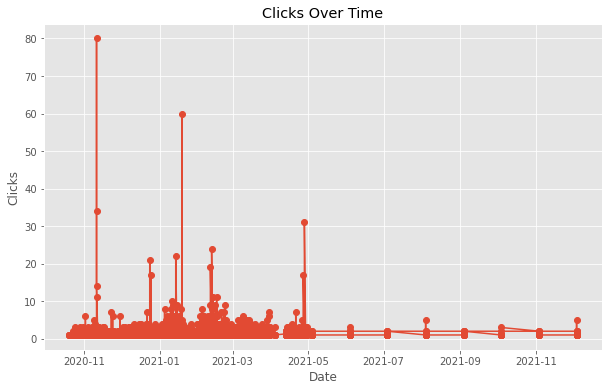

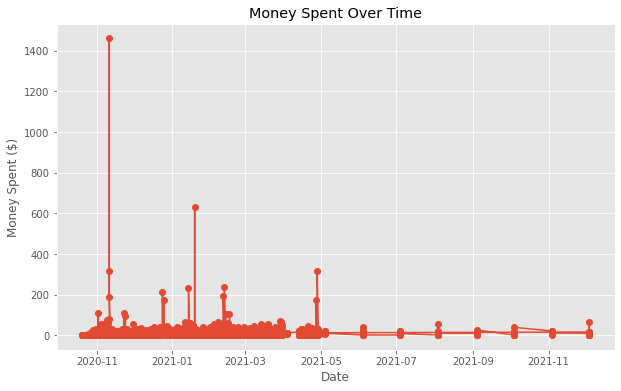

In [24]:
data_ls['Date of Report'] = pd.to_datetime(data_ls['Date of Report'])

# Set 'Date of Report' as the index for time series analysis
data_ls.set_index('Date of Report', inplace=True)

# Plot 'Clicks' over time
plt.figure(figsize=(10, 6))
plt.plot(data_ls['Clicks'], marker='o')
plt.title('Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.show()

# Plot 'Money Spent ($)' over time
plt.figure(figsize=(10, 6))
plt.plot(data_ls['Money Spent ($)'], marker='o')
plt.title('Money Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.show()



**Observation**: Clicks Over Time Has some Changes to Observe ie During These months of these years 2020-11,2021-01,2021-03 and 2021-05
    Average Around 45 Clicks were Observed with Maximum in 2020-11 and minimum in 2021-05 and Later that there is a Significant Drop Observed.
    The Same Issue is Observed With Money Spent Over Time . 
    So the COnclusion is the More MOney Spent on Advertisement more Respone will be Generated else a mere response will be Observed.

Task 5: Analyse the Impact of geography

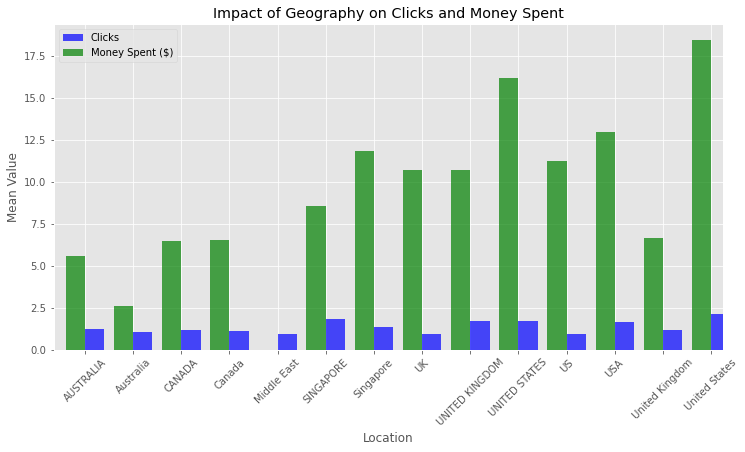

In [25]:
# Plot 'Clicks' and 'Money Spent ($)' for each location
grouped_data = data_ls.groupby('Location')[['Clicks', 'Money Spent ($)']].mean()
plt.figure(figsize=(12, 6))
grouped_data['Clicks'].plot(kind='bar', color='blue', alpha=0.7, width=0.4, position=0, label='Clicks')
grouped_data['Money Spent ($)'].plot(kind='bar', color='green', alpha=0.7, width=0.4, position=1, label='Money Spent ($)')
plt.title('Impact of Geography on Clicks and Money Spent')
plt.xlabel('Location')
plt.ylabel('Mean Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Observation**: We Can Observe that More money is Spent on United States , With Least Money Spent on Middle East but Still Expecting some Clicks.
After US , in UK and Singapore  money is mostly Spent for Ads
Clicks are directly Proportional to money Spent on Advertisement

### Self Evaluation (Additional Questions)

Q1) Time Series Forecasting: We can perform time series forecasting using techniques like ARIMA or SARIMA to predict future values of key metrics such as 'Clicks' and 'Money Spent ($)' based on past observations. This can help in making informed decisions about budget allocation and campaign planning

In [27]:
data=listing_site_df.copy()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-

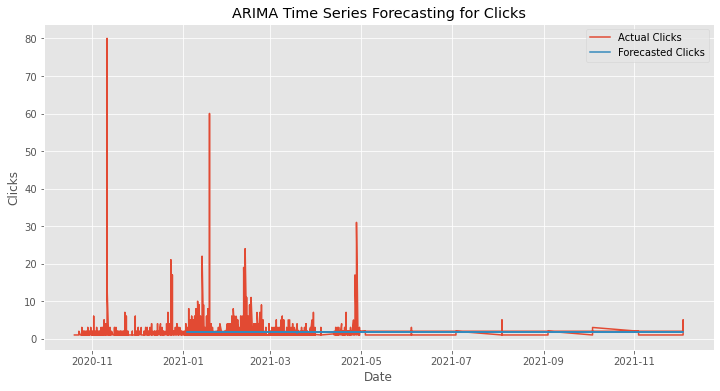

In [28]:

from statsmodels.tsa.arima.model import ARIMA

data['Date of Report'] = pd.to_datetime(data['Date of Report'])

data.set_index('Date of Report', inplace=True)

data.dropna(subset=['Clicks'], inplace=True)

train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

order = (1, 0, 1)  # (p, d, q) order for ARIMA model
model = ARIMA(train_data['Clicks'], order=order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test_data))


plt.figure(figsize=(12, 6))
plt.plot(data['Clicks'], label='Actual Clicks')
plt.plot(test_data.index, forecast, label='Forecasted Clicks')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('ARIMA Time Series Forecasting for Clicks')
plt.legend()
plt.show()


NOTE: In Beginning we have seen that There was No any Money Spent after 2021-05 so there was No any Clicks that were meant to be Forecasted the Same thing is with Money Spent($)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-

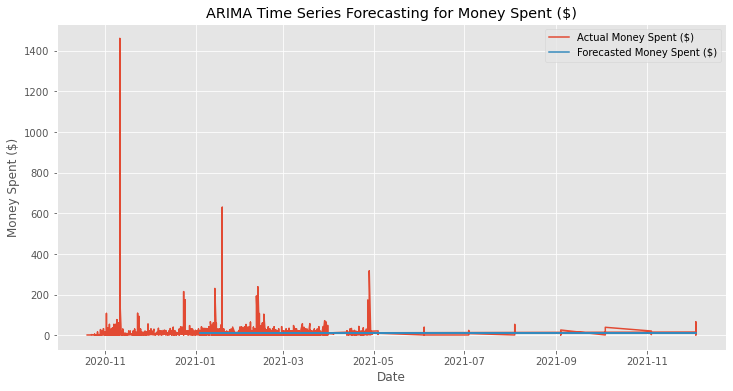

In [29]:

data.dropna(subset=['Money Spent ($)'], inplace=True)


train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

order = (1, 0, 1)  # (p, d, q) order for ARIMA model
model = ARIMA(train_data['Money Spent ($)'], order=order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(12, 6))
plt.plot(data['Money Spent ($)'], label='Actual Money Spent ($)')
plt.plot(test_data.index, forecast, label='Forecasted Money Spent ($)')
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.title('ARIMA Time Series Forecasting for Money Spent ($)')
plt.legend()
plt.show()


Q2) Correlation Matrix

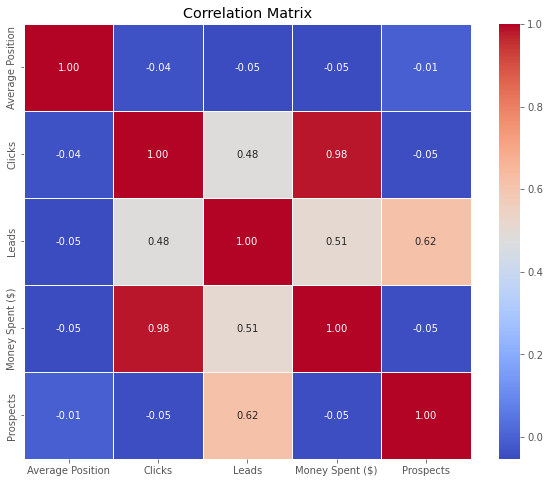

In [30]:

numerical_cols = ['Average Position', 'Clicks', 'Leads', 'Money Spent ($)', 'Prospects']

data = data.dropna(subset=numerical_cols)

correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Q3) CLicks by Location

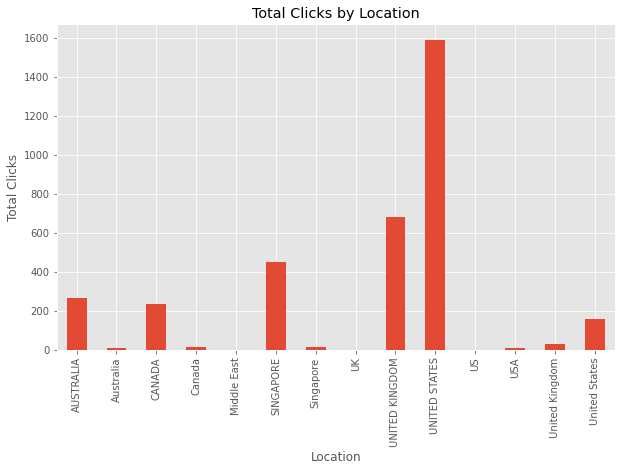

In [33]:
clicks_by_location = data_ls.groupby('Location')['Clicks'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
clicks_by_location.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Location')
plt.xticks(rotation=90)
plt.show()

Q4) Categorical Variable Analysis: We can perform analysis on categorical variables such as 'Channel' and 'Categories' to understand their impact on key metrics. This can be done using bar plots, box plots, or violin plots to compare the distribution of metrics across different categories

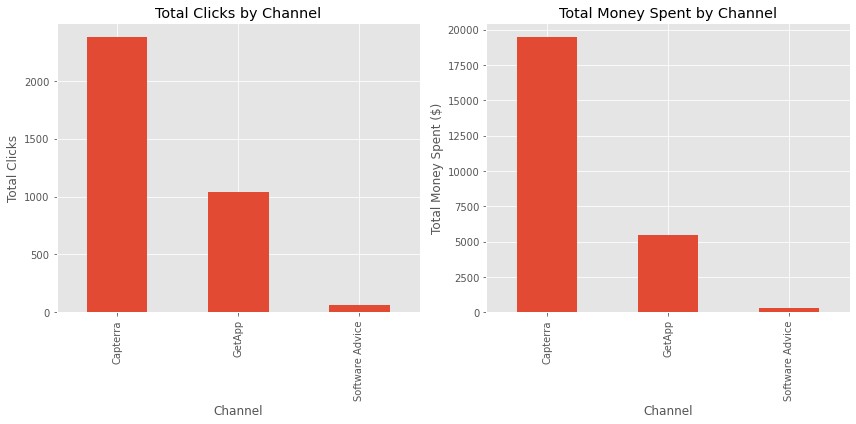

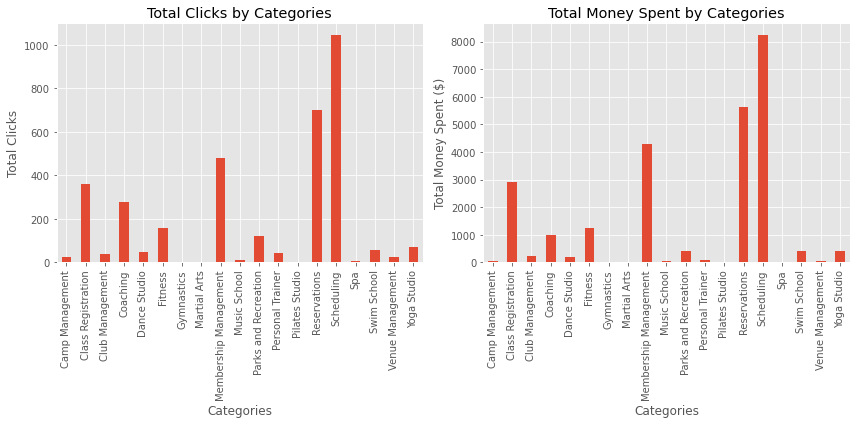

In [34]:
import matplotlib.pyplot as plt

# Create bar plots for 'Channel'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data_ls.groupby('Channel')['Clicks'].sum().plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Channel')

plt.subplot(1, 2, 2)
data_ls.groupby('Channel')['Money Spent ($)'].sum().plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Total Money Spent ($)')
plt.title('Total Money Spent by Channel')
plt.tight_layout()
plt.show()

# Create bar plots for 'Categories'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data_ls.groupby('Categories')['Clicks'].sum().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Categories')

plt.subplot(1, 2, 2)
data_ls.groupby('Categories')['Money Spent ($)'].sum().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Total Money Spent ($)')
plt.title('Total Money Spent by Categories')
plt.tight_layout()
plt.show()


Q5) Hypothesis Testing: We can conduct hypothesis testing to validate certain assumptions or claims about the data. For example, we can test if the mean 'Clicks' for different 'Categories' are significantly different or if there is a significant difference in 'Money Spent ($)' between different 'Channels'

In [40]:
data_ls['Categories'].unique()

array(['Coaching', 'Dance Studio', 'Personal Trainer', 'Scheduling',
       'Class Registration', 'Fitness', 'Swim School', 'Yoga Studio',
       'Camp Management', 'Music School', 'Reservations',
       'Club Management', 'Gymnastics', 'Venue Management',
       'Membership Management', 'Parks and Recreation', 'Spa',
       'Martial Arts', 'Pilates Studio'], dtype=object)

In [35]:
# Testing the Difference in Mean Clicks for Different Categories:
# To test if the mean 'Clicks' for different 'Categories' are significantly different, we can use a one-way ANOVA (Analysis of Variance) test. This will help us determine if there is a significant difference in the average number of clicks across the different categorie

import scipy.stats as stats

# Perform one-way ANOVA for 'Clicks' and 'Categories'
anova_result = stats.f_oneway(*[data_ls[data_ls['Categories'] == category]['Clicks'] for category in data_ls['Categories'].unique()])

# Print the results
print("One-way ANOVA for Clicks and Categories:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


One-way ANOVA for Clicks and Categories:
F-statistic: nan
p-value: nan


In [38]:
data_ls['Channel'].unique()

array(['Capterra', 'GetApp', 'Software Advice'], dtype=object)

In [41]:
# Separate data for each channel
channel1_data = data_ls[data_ls['Channel'] == 'Capterra']['Money Spent ($)']
channel2_data = data_ls[data_ls['Channel'] == 'GetApp']['Money Spent ($)']
channel3_data = data_ls[data_ls['Channel'] == 'Software Advice']['Money Spent ($)']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(channel1_data, channel2_data, nan_policy='omit')

# Print the results
print("Two-sample t-test for Money Spent ($) and Channel:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Two-sample t-test for Money Spent ($) and Channel:
t-statistic: 5.333367664656387
p-value: 1.0713274504277994e-07


In [ ]:
# The p_value is less than 0.05 hence we reject Null and Conclude there is some Significant difference

In [58]:
data=listing_site_df.copy()

In [59]:
data=data.dropna()

Q6): Clustering Analysis: We can perform clustering analysis on the data to group similar campaigns based on their performance metrics. This can help in identifying segments of campaigns that exhibit similar characteristics.

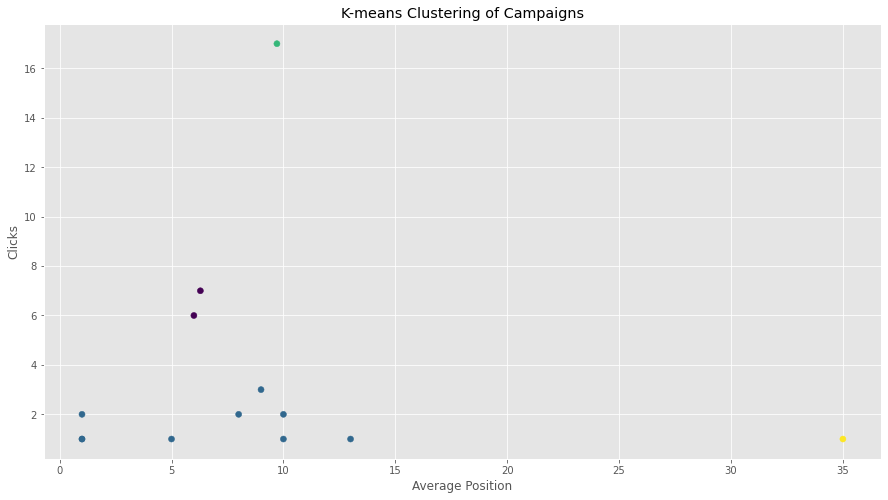

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant performance metrics for clustering
metrics_for_clustering = ['Average Position', 'Clicks', 'Money Spent ($)']

# Create a new DataFrame with selected metrics
data_clustering = data[metrics_for_clustering]

# Drop rows with missing values
data_clustering.dropna(inplace=True)

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)

# Perform K-means clustering with a pre-defined number of clusters (k)
k = 4  # You can choose the number of clusters based on your business needs
kmeans = KMeans(n_clusters=k, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering_scaled)

# Plot the clusters in 2D space using the first two metrics
plt.scatter(data_clustering['Average Position'], data_clustering['Clicks'], c=data_clustering['Cluster'], cmap='viridis')
plt.xlabel('Average Position')
plt.ylabel('Clicks')
plt.title('K-means Clustering of Campaigns')
plt.show()

Q8) Apply Machine Learning To Predict  the Clicks and also to Identify The Feature Importance 

In [69]:
from sklearn.preprocessing import LabelEncoder

In [68]:
for i in data_ls.select_dtypes(include='O'):
    print(i,'=',data_ls[i].unique())

Product Name = ['Omnify']
Categories = ['Coaching' 'Dance Studio' 'Personal Trainer' 'Scheduling'
 'Class Registration' 'Fitness' 'Swim School' 'Yoga Studio'
 'Camp Management' 'Music School' 'Reservations' 'Club Management'
 'Gymnastics' 'Venue Management' 'Membership Management'
 'Parks and Recreation' 'Spa' 'Martial Arts' 'Pilates Studio']
Channel = ['Capterra' 'GetApp' 'Software Advice']
Location = ['UNITED STATES' 'UNITED KINGDOM' 'SINGAPORE' 'AUSTRALIA' 'CANADA'
 'Middle East' 'USA' 'UK' 'US' 'United States' 'Canada' 'Singapore'
 'United Kingdom' 'Australia']


In [70]:
le=LabelEncoder()
data_ls['Channel']=le.fit_transform(data_ls['Channel'])
data_ls['Location']=le.fit_transform(data_ls['Location'])

In [71]:
data_ls.isnull().sum()

Product Name        0
Categories          0
Average Position    1
Clicks              1
Money Spent ($)     2
Channel             0
Location            0
Week                0
Month               0
ROAS                2
dtype: int64

In [72]:
data_ls=data_ls.dropna()

In [73]:
for i in data_ls.select_dtypes(include=np.number):
    print(i)

Average Position
Clicks
Money Spent ($)
Channel
Location
ROAS


In [75]:
X=data_ls[['Average Position','Money Spent ($)','Channel','Location']]
y=data_ls['Clicks']


rf = RandomForestRegressor(random_state=42)


rf.fit(X,y)

feature_importances = rf.feature_importances_


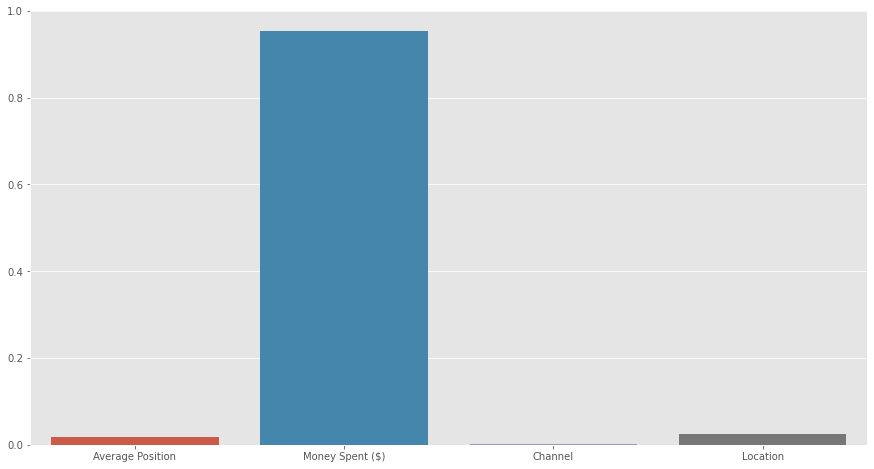

In [78]:
sns.barplot(x=X.columns,y=feature_importances)
plt.show()

Money Spent is the Only Important Column that Is Signifiacantly Affecting the Clicks over Time 

### Additional Enhancements 
Time Series Forecasting: As we have seen earlier, we can use time series forecasting techniques like ARIMA or SARIMA to predict future values of key metrics such as 'Clicks' and 'Money Spent ($)'. This can help in planning future ad campaigns and budget allocation.

A/B Testing: If the data contains information about different ad variations or experiments, we can perform A/B testing to compare the performance of different ad versions and identify which ones yield better results.

Customer Segmentation: We can perform customer segmentation based on various attributes such as 'Channel', 'Categories', or 'Location'. This can help in identifying different customer groups with distinct preferences and behaviors.

Customer Lifetime Value (CLV) Analysis: If there is data on customer transactions or purchases, we can calculate the Customer Lifetime Value (CLV) to understand the long-term profitability of different customer segments.

Attribution Modeling: Attribution modeling can help in understanding which marketing channels or touchpoints contribute the most to conversions (e.g., 'Leads' or 'Prospects'). This can provide insights into the most effective marketing strategies.

Customer Behavior Analysis: By analyzing customer behavior data, we can identify patterns and trends in user engagement and interactions with the ads. This can help in optimizing ad targeting and messaging.

Churn Analysis: If there is data on customer churn (i.e., when customers stop engaging with the ads), we can perform churn analysis to identify factors that lead to customer attrition and take proactive measures to retain customers.

Geographic Clustering: We can use clustering algorithms to group geographic locations based on their performance metrics. This can help in identifying regions with similar customer behavior and tailoring ad campaigns accordingly.

Customer Sentiment Analysis: If there is additional text data related to customer reviews or feedback, we can perform sentiment analysis to understand customer sentiment towards the products or services.

Feature Engineering: We can create new features from the existing data that may have a significant impact on the target variable. Feature engineering can help improve the performance of machine learning models.

Outlier Detection: Identifying and analyzing outliers in the data can provide insights into unusual patterns or anomalies that may impact the overall analysis.

Customer Journey Analysis: Analyzing the entire customer journey, from the first interaction with the ad to conversion, can provide insights into the effectiveness of different touchpoints in the conversion process.

Sales Funnel Analysis: If there is data on the sales funnel (i.e., the stages a prospect goes through before becoming a customer), we can perform sales funnel analysis to optimize the conversion process.

Customer Retention Analysis: If there is data on customer retention or repeat purchases, we can analyze customer retention rates and identify strategies to improve customer loyalty.

# Conclusion
The analysis of both Google Ads and Listed Site Campaign datasets provided valuable insights into campaign performance and helped optimize marketing efforts. By leveraging data-driven strategies and advanced analytical techniques, we were able to identify profitable channels, keywords, and customer segments. These insights can guide future marketing campaigns and contribute to overall business growth.

____________________________________
# THANK YOU
_______________________________________